This is formatting and aligning data from Copernicus EMS data: https://rapidmapping.emergency.copernicus.eu/

In [1]:
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import yaml
from rasterio.crs import CRS
import pandas as pd

In [31]:
yaml_file = '../events/attica_fire_2024.yml' #'porto_algre.yml'
with open(yaml_file) as f:
    event_dict = yaml.safe_load(f)["event"]
event_dict

{'event_name': 'attica_fire_2024',
 'bounds': [10.97631339, 43.81441325, 11.15319728, 43.98650075],
 'event_date': '2024-08-11',
 'pre_event_window_days': 100,
 'post_event_window_days': 60,
 'rtc_track_numbers': [15, 168],
 'mgrs_tiles': ['32TPP'],
 'dist_hls_confirmed_change_min_days': 30,
 'source_id': 'Copernicus EMSR746',
 'links': ['https://rapidmapping.emergency.copernicus.eu/EMSR746',
  'https://en.wikipedia.org/wiki/2024_Attica_wildfires',
  'https://www.independent.co.uk/news/world/europe/greece-wildfires-latest-satellite-images-b2595495.html']}

In [34]:
df_event = gpd.read_file('../external_validation_data/copernicus_ems/greece_attica_fire_2024/EMSR746_AOI01_DEL_MONIT02_observedEventA_v1.shp')
df_event.head()

,event_type,obj_desc,det_method,notation,dmg_src_id,area,geometry
0,8-Wildfire,"Land fire: Brush, bush, Pasture",Photo-interpretation,Burnt area,4,0.529487,"POLYGON ((23.85765 38.03539, 23.85769 38.03527..."
1,8-Wildfire,"Land fire: Brush, bush, Pasture",Photo-interpretation,Burnt area,4,1.019033,"POLYGON ((23.85086 38.03815, 23.85070 38.03760..."
2,8-Wildfire,"Land fire: Brush, bush, Pasture",Photo-interpretation,Burnt area,4,56.291607,"POLYGON ((23.84996 38.05174, 23.85010 38.05160..."
3,8-Wildfire,"Land fire: Brush, bush, Pasture",Photo-interpretation,Burnt area,4,2.441494,"POLYGON ((23.85904 38.04450, 23.85929 38.04444..."
4,8-Wildfire,"Land fire: Brush, bush, Pasture",Photo-interpretation,Burnt area,4,0.383931,"POLYGON ((23.86137 38.04596, 23.86173 38.04531..."


<Axes: >

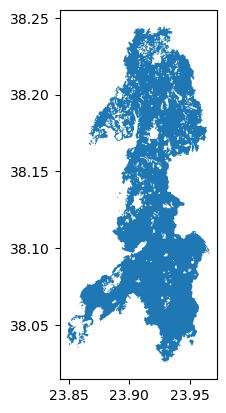

In [35]:
df_event.plot()

In [37]:
df_event.total_bounds

array([23.84811098, 38.02547756, 23.96650282, 38.24431915])

In [38]:
geo = df_event.geometry.unary_union

df_event_f = gpd.GeoDataFrame({'name': [event_dict['event_name']],
                               'date': [pd.to_datetime(event_dict['event_date'])],
                               'source_id': [f'Copernicus {event_dict["source_id"]}']},
                              geometry=[geo],
                              crs=CRS.from_epsg(4326))
df_event_f.head()

,name,date,source_id,geometry
0,attica_fire_2024,2024-08-11,Copernicus Copernicus EMSR746,"MULTIPOLYGON (((23.85731 38.03476, 23.85723 38..."


In [39]:
EXTERNAL_VAL_DATA_DIR = Path('../external_validation_data_db/')
EXTERNAL_VAL_DATA_DIR.mkdir(exist_ok=True, parents=True)

In [41]:
df_event_f.to_file(EXTERNAL_VAL_DATA_DIR / f'{event_dict["event_name"]}.geojson', driver='GeoJSON')